In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import gaussian_kde
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv('hgdt_converted.csv', header=0)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V2534,V2535,V2536,V2537,V2538,V2539,V2540,V2541,V2542,V2543
0,427,Pakistan,CENTRAL_SOUTH_ASIA,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,745,Siberia,EAST_ASIA,0,0,1,1,0,0,1,...,1,0,0,0,1,1,0,0,0,1
2,449,Pakistan,CENTRAL_SOUTH_ASIA,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,1,1
3,876,France,EUROPE,0,1,0,1,0,1,2,...,0,0,0,0,0,0,0,1,1,2
4,555,China,EAST_ASIA,0,0,1,1,1,0,2,...,0,0,1,1,0,0,1,0,0,2


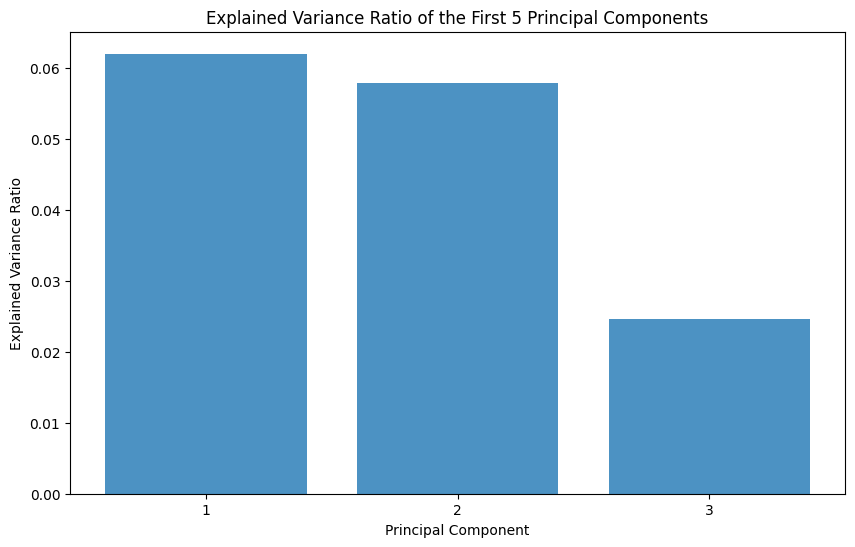

In [11]:
genotype_data = data.iloc[:, 3:]

# standardize genotype data
scaler = StandardScaler()
genotype_data_std = scaler.fit_transform(genotype_data)

# PCA
pca = PCA(n_components=3)  # define the number of principal components = 3
pca_result = pca.fit_transform(genotype_data_std)

# extract continent information
continent_info = data[['V2', 'V3']]  # V2 = Country, V3 = Continent

# combine the results of PCA and continent information
pca_result_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_result_df[['Country', 'Continent']] = continent_info

continents = pca_result_df['Continent'].unique()

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a bar plot for the explained variance ratio of the first 5 principal components
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of the First 5 Principal Components')
plt.show()

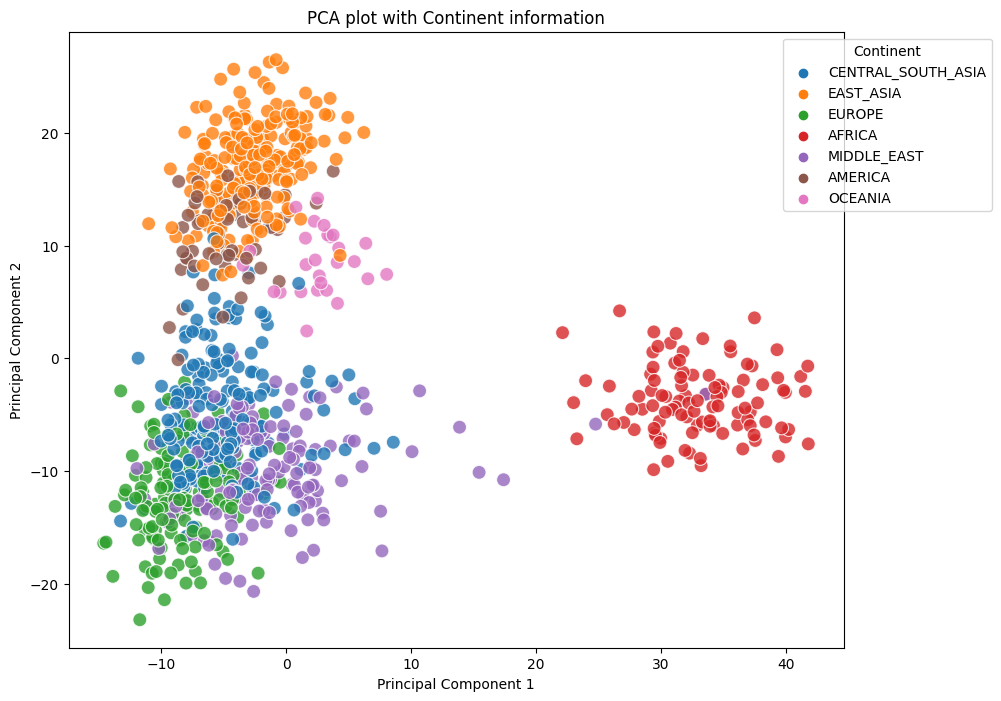

In [9]:
# set the color palette
palette = sns.color_palette("tab10", n_colors=len(continents))

plt.figure(figsize=(10, 8))

# plot the PCA results for all continents using PC1 and PC2
sns.scatterplot(x='PC1', y='PC2', data=pca_result_df, hue='Continent', palette=palette, s=100, alpha=0.8)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA plot with Continent information')
plt.legend(title='Continent', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

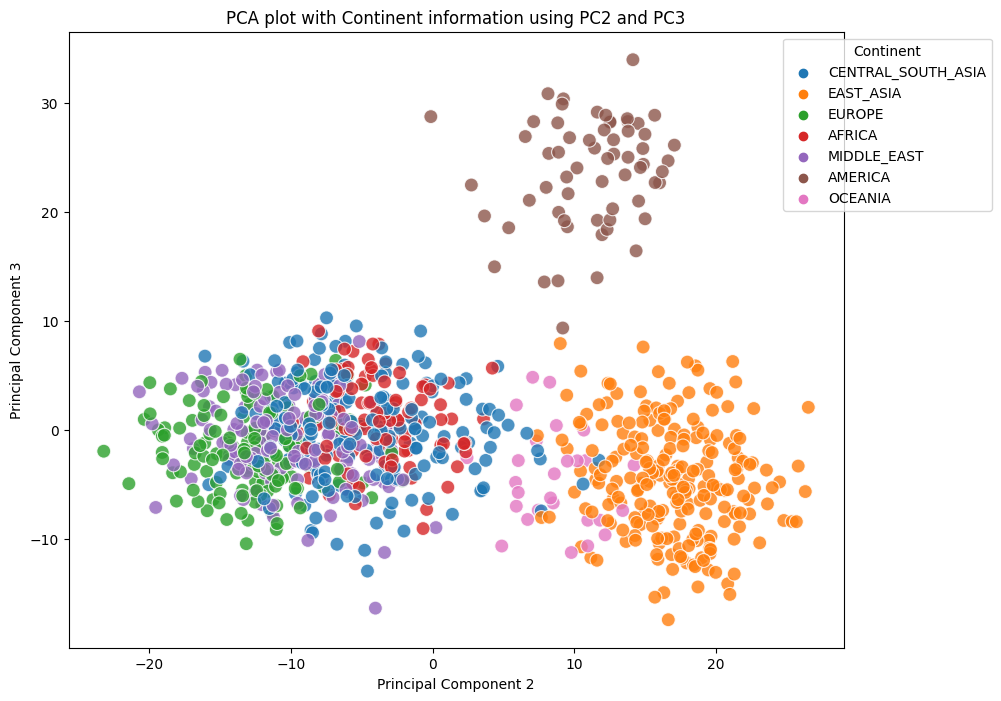

In [10]:
plt.figure(figsize=(10, 8))

# plot the PCA results for all continents using PC2 and PC3
sns.scatterplot(x='PC2', y='PC3', data=pca_result_df, hue='Continent', palette=palette, s=100, alpha=0.8)

plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.title('PCA plot with Continent information using PC2 and PC3')
plt.legend(title='Continent', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()

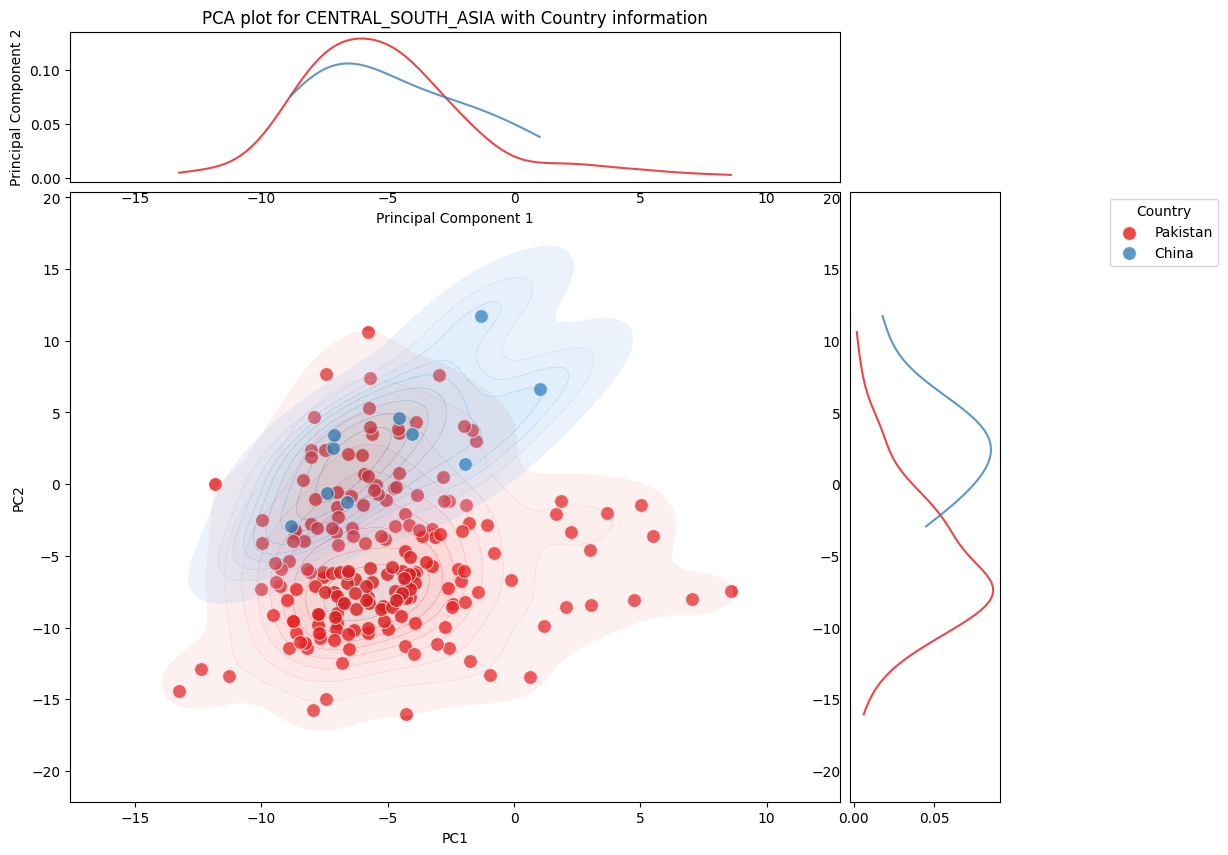

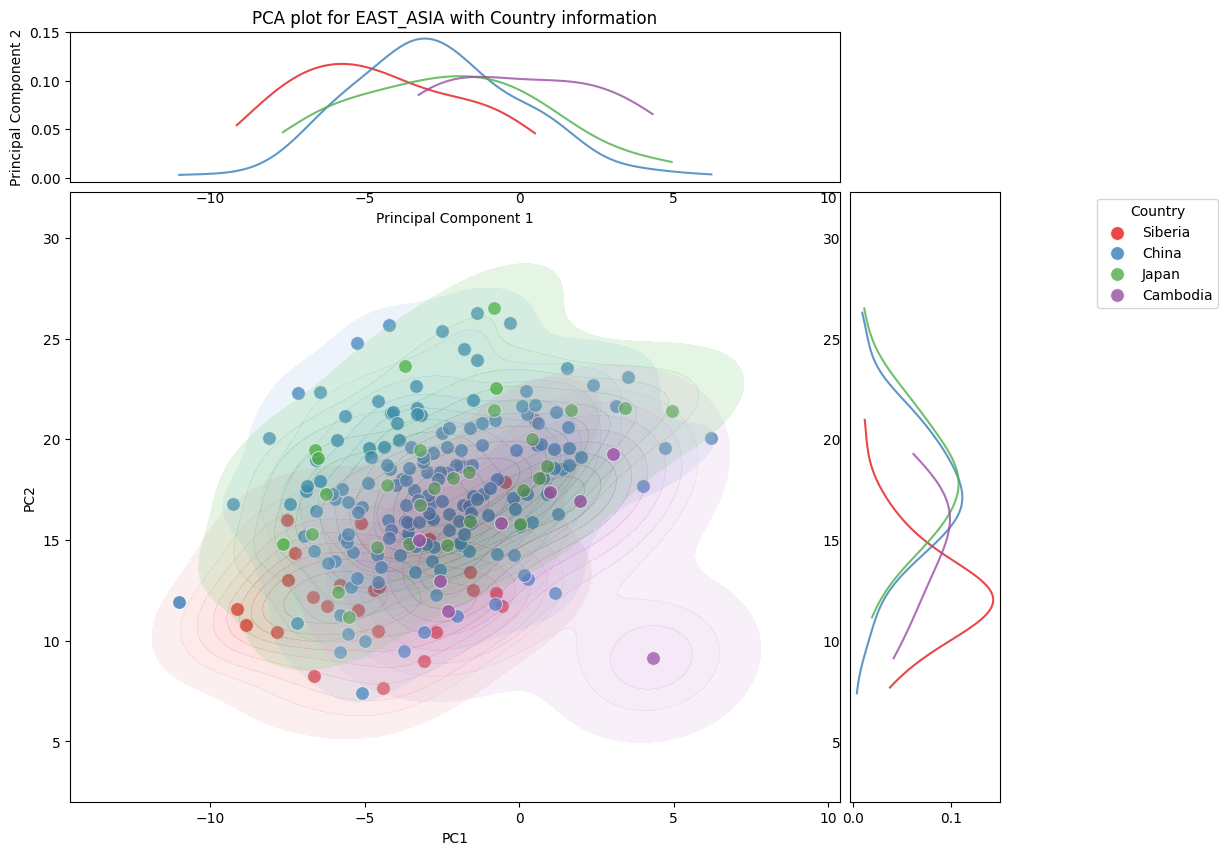

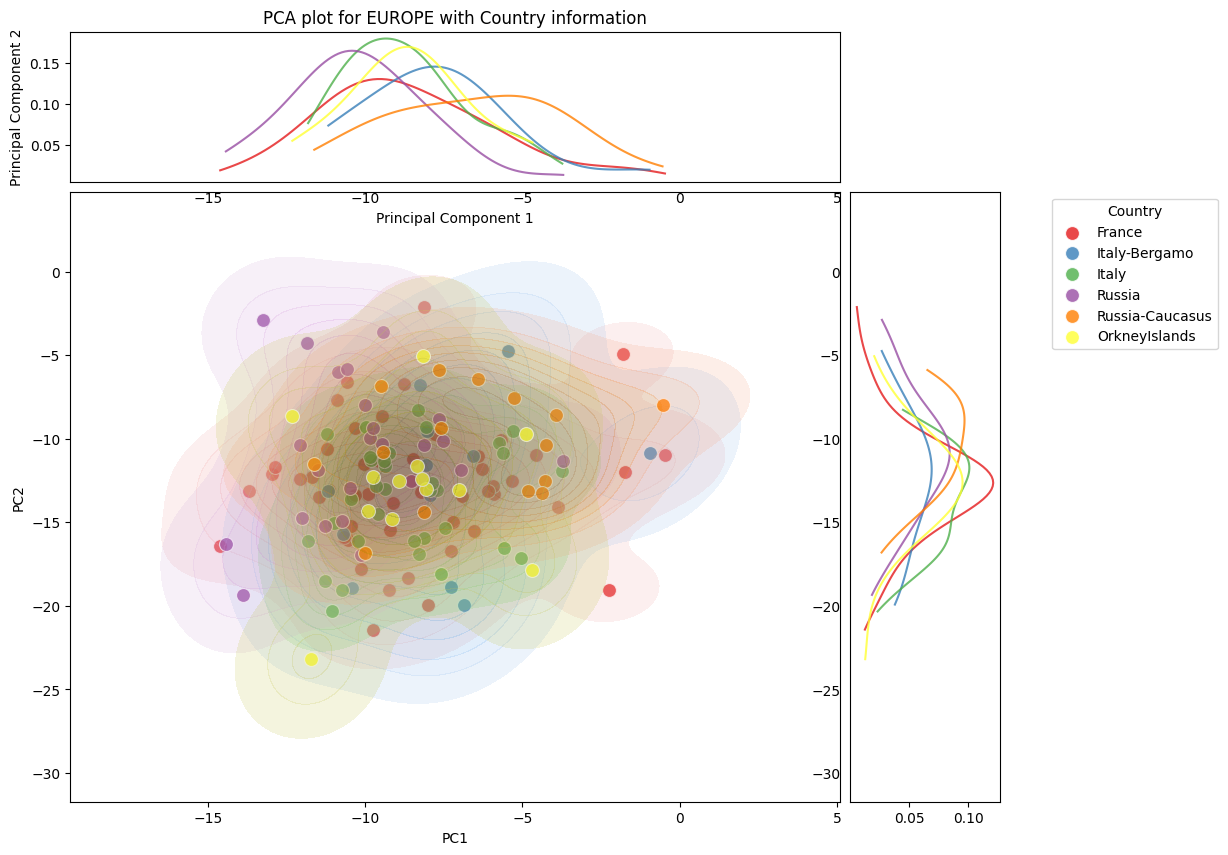

C:\Users\LL\AppData\Local\Temp\ipykernel_11676\2036445358.py:29: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=Country_df, x='PC1', y='PC2', fill=True, color=palette[i], alpha=0.2, ax=ax)


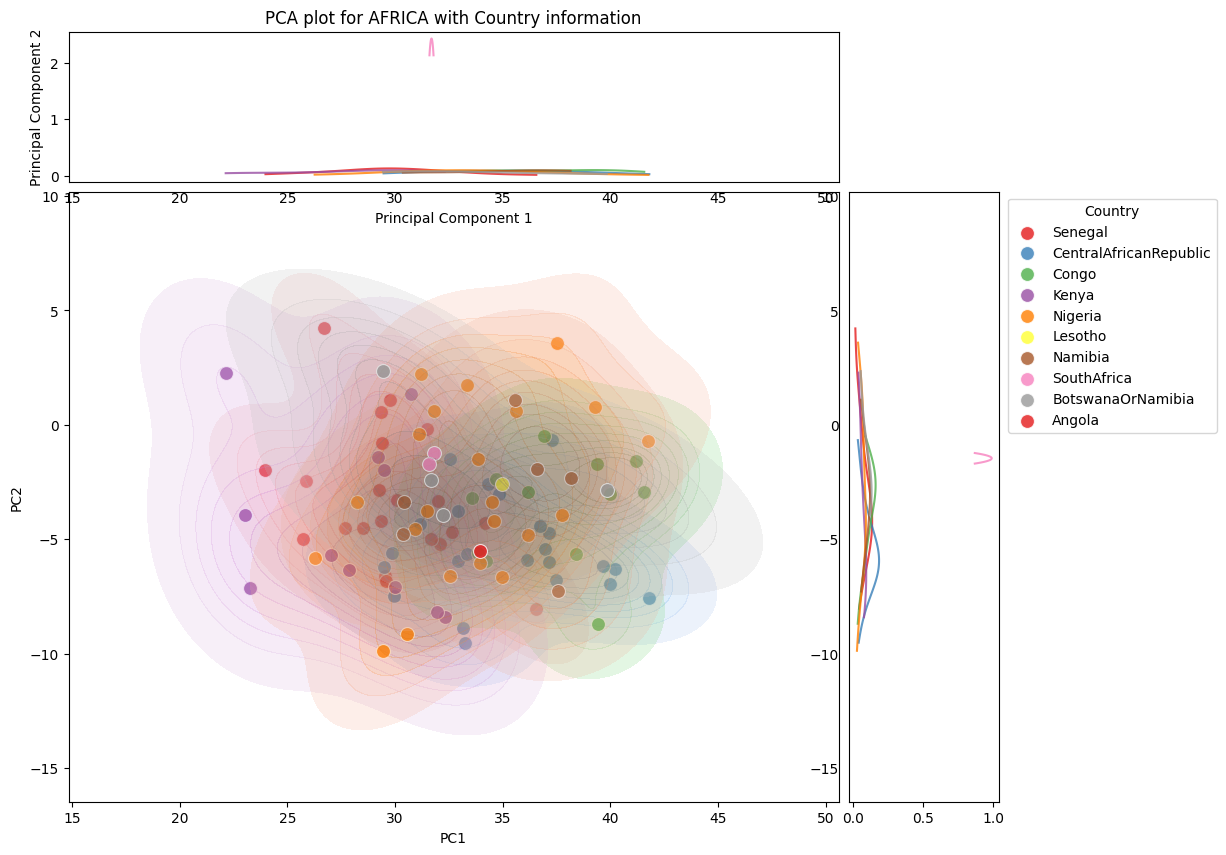

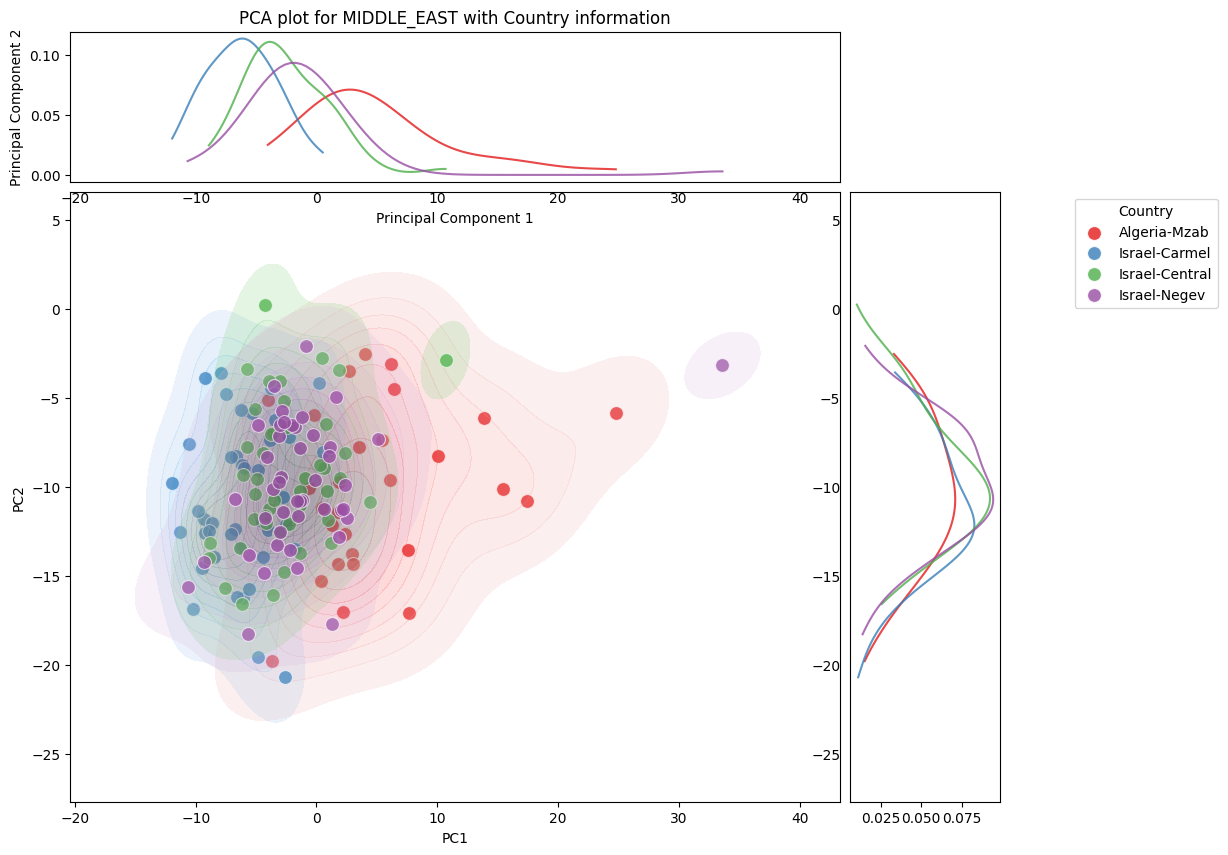

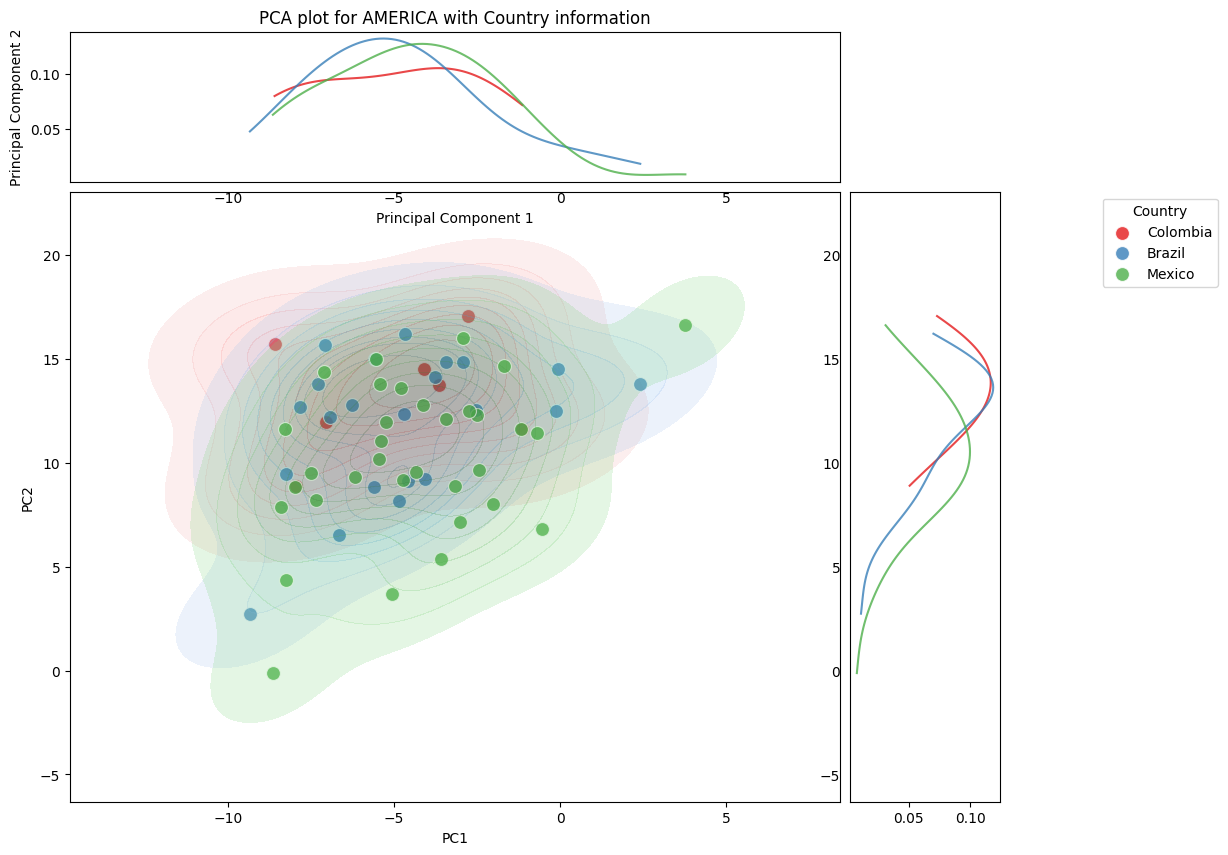

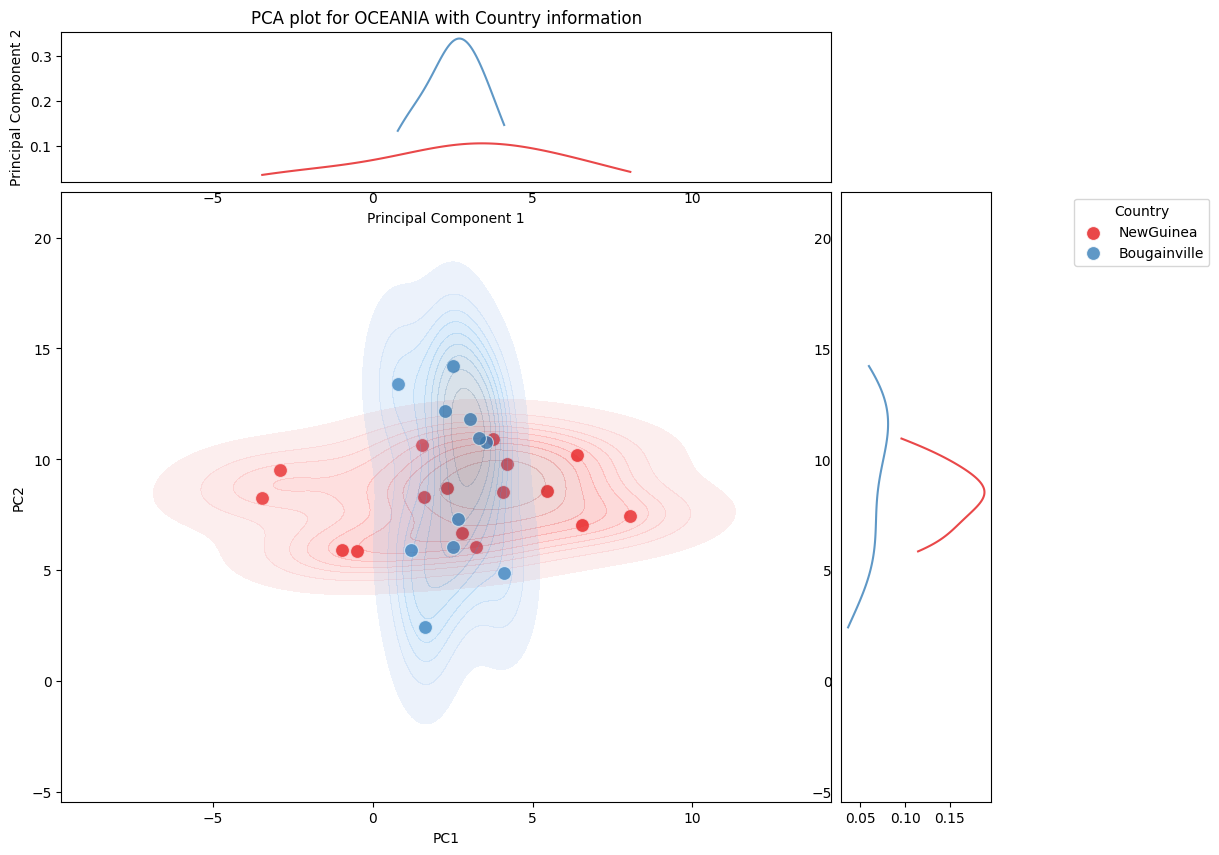

In [17]:
palette = sns.color_palette("Set1", n_colors=len(pca_result_df['Country'].unique()))

# plot the PCA results for each continent using PC1 and PC2
for continent in continents:
    continent_df = pca_result_df[pca_result_df['Continent'] == continent]
    Countrys = continent_df['Country'].unique()

    fig, ax = plt.subplots(figsize=(12, 10))
    
    divider = make_axes_locatable(ax)
    ax_right = divider.append_axes("right", size=1.5, pad=0.1, sharey=ax)
    ax_top = divider.append_axes("top", size=1.5, pad=0.1, sharex=ax)
    
    for i, Country in enumerate(Countrys):
        Country_df = continent_df[continent_df['Country'] == Country]
        # scatter plot
        sns.scatterplot(x='PC1', y='PC2', data=Country_df, color=palette[i], s=100, alpha=0.8, label=Country, ax=ax)
        
        if len(Country_df) > 1:
            # calculate the density distribution
            kde_x = gaussian_kde(Country_df['PC1'], bw_method='silverman')
            kde_y = gaussian_kde(Country_df['PC2'], bw_method='silverman')
            x_range = np.linspace(Country_df['PC1'].min(), Country_df['PC1'].max(), 100)
            y_range = np.linspace(Country_df['PC2'].min(), Country_df['PC2'].max(), 100)
            # plot the density distribution
            ax_top.plot(x_range, kde_x(x_range), color=palette[i], alpha=0.8)
            ax_right.plot(kde_y(y_range), y_range, color=palette[i], alpha=0.8)
            # plot the density distribution
            sns.kdeplot(data=Country_df, x='PC1', y='PC2', fill=True, color=palette[i], alpha=0.2, ax=ax)

    ax_right.set_ylabel('')
    ax_top.set_xlabel('')
    ax_right.yaxis.set_ticks_position('none')
    ax_top.xaxis.set_ticks_position('none')

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(f'PCA plot for {continent} with Country information')
    # adjust the position of the legend
    legend = ax.legend(title='Country', loc='upper right', bbox_to_anchor=(1.5, 1))
    
    plt.show()

Explained Variance Ratios for the first 5 Principal Components:
[0.06195748 0.05781031]


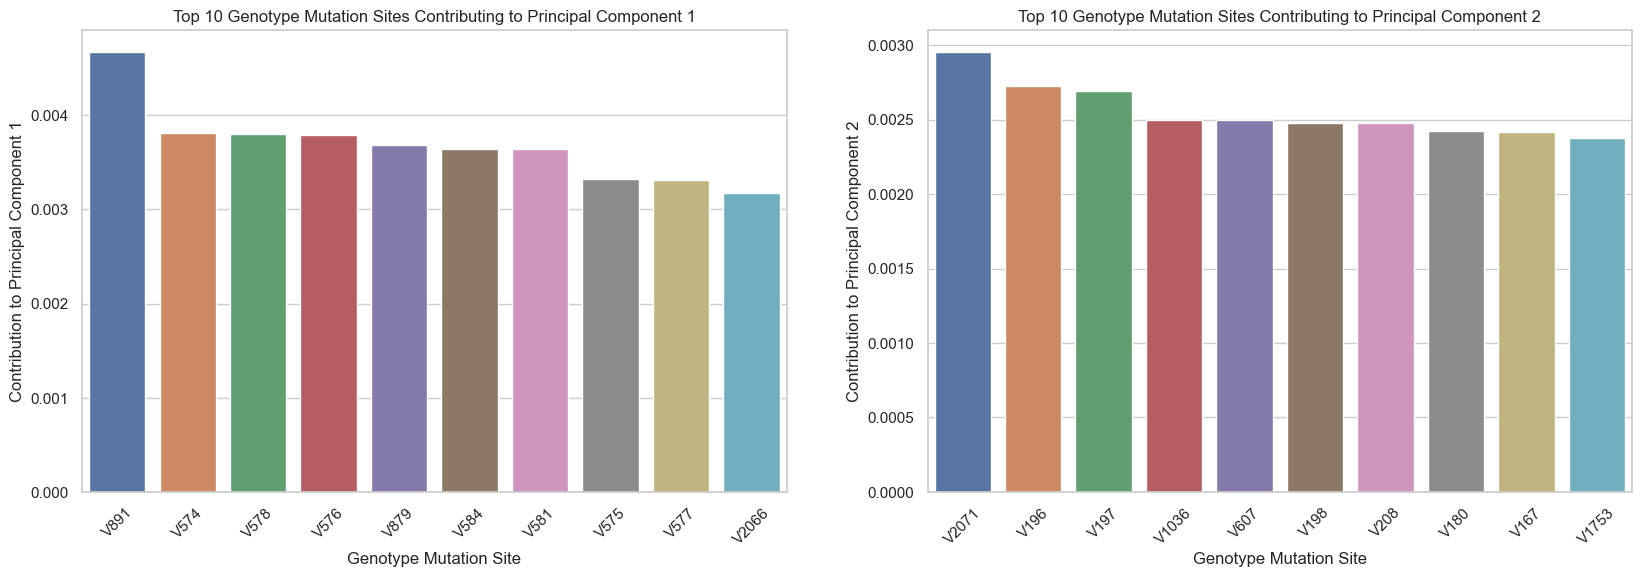

In [86]:
# calculate the proportion of variance explained by each principal component
component_weights = pca.components_ ** 2

# extract top 10 features for PC1
top10_features_PC1 = pd.Series(component_weights[0], index=genotype_data.columns).nlargest(10)
# extract top 10 features for PC2
top10_features_PC2 = pd.Series(component_weights[1], index=genotype_data.columns).nlargest(10)

# plot top 10 features for PC1 and PC2
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

sns.barplot(x=top10_features_PC1.index, y=top10_features_PC1.values, ax=axes[0])
axes[0].set_xlabel('Genotype Mutation Site')
axes[0].set_ylabel('Contribution to Principal Component 1')
axes[0].set_title('Top 10 Genotype Mutation Sites Contributing to Principal Component 1')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x=top10_features_PC2.index, y=top10_features_PC2.values, ax=axes[1])
axes[1].set_xlabel('Genotype Mutation Site')
axes[1].set_ylabel('Contribution to Principal Component 2')
axes[1].set_title('Top 10 Genotype Mutation Sites Contributing to Principal Component 2')
axes[1].tick_params(axis='x', rotation=45)

plt.show()

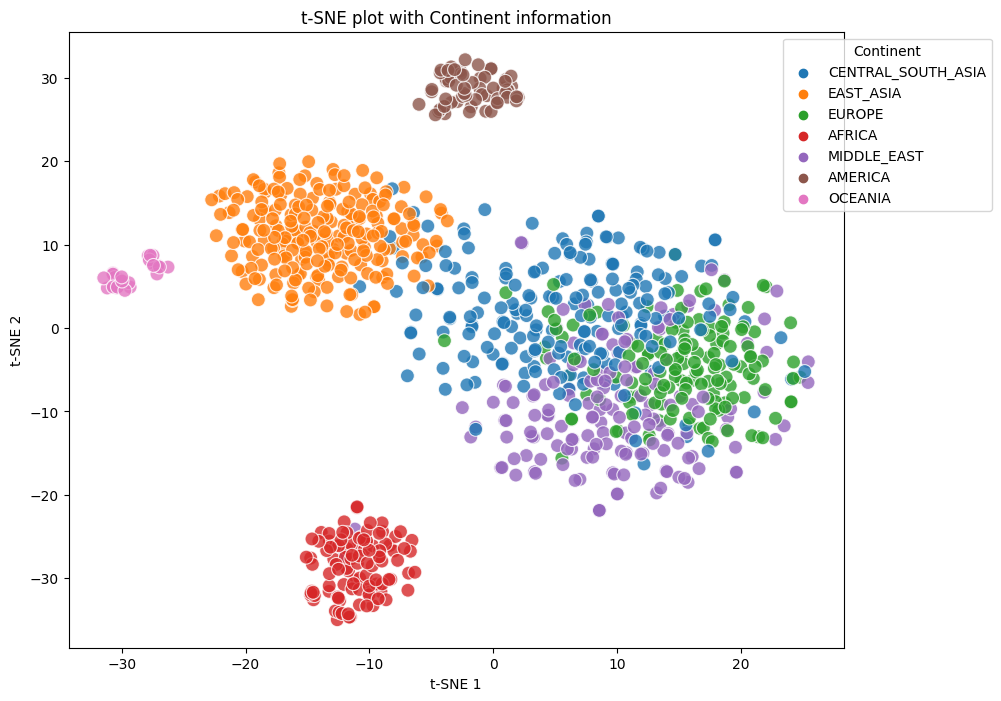

In [15]:
# t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(genotype_data_std)

# combine the results of PCA and t-SNE with continent information
tsne_result_df = pd.DataFrame(tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_result_df[['Country', 'Continent']] = continent_info

# plot t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=tsne_result_df, hue='Continent', palette=palette, s=100, alpha=0.8)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE plot with Continent information')
plt.legend(title='Continent', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.show()